$\def\pder#1#2{\frac{\partial#1}{\partial#2}}$
$\def\d#1#2{\frac{\mathrm{d}#1}{\mathrm{d}#2}}$
$\def\VolInt#1{\int_{\mathsf{V}}#1\,\mathrm{d}\mathsf{V}}$
$\def\SurfInt#1{\int_{\mathsf{S}}#1\cdot\mathbf{a}\,\mathrm{d}\mathsf{S}}$

<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 3 Problem 3
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline including dismissal from the chemical engineering program and potentially from the university.

Given the cylindrical tank in the figure below where a chemical reaction 
$$
    A\stackrel{k}{\longrightarrow}B 
$$
is occurring with reaction rate given by $S_{A}=-kc_{A}^2$. 
![cylindrical tank](Tank.png)
Assume that you are given $c_{A}^{in}$ (the inlet concentration of species $A$), $\dot{V}_{in}$, $r$ (the radius of the hole in the bottom of the tank) and $u=\sqrt{2gh}$ for the outlet velocity. 
You may assume that the concentration is uniform throughout the tank (perfect mixing). 
Also assume that the reaction does not result in a change in the molar volume of the mixture.

 1. Show that $$\d{c_{A}}t=\frac{\dot{V}_{in}}{A_{c}h}\left(c_{A}^{in}-c_{A}\right)-kc_{A}^2,$$ where $A_{c}$ is the cross-sectional area of the tank.

    ___Hints:___

     * Note that both $c_{A}$ and $V$ are changing in time. 
     * You will need to derive an equation for $\d{V}{t}$ which you can substitute.

    Note that you need to show work that demonstrates that you can derive this (working backward from the answer won't get you too far). Otherwise you won't receive credit.
 1. Determine $c_{A}(t)$ and $h(t)$ given: a tank diameter of 0.5 m and height of $H=1$ m, $c_{A}(0)=0\,\mathrm{\frac{mol}{m^{3}}}$, $c_{A}^{in}=1\,\mathrm{\frac{mol}{m^{3}}}$, $k=10^{-2}\,\text{s}^{-1}$, a hole in the bottom with radius $r=1$ cm, an inlet flow rate tank such that at steady state the tank is 50% full, and an initial liquid level of 5% and 95% the tank height. Plot the concentration of $A$, the moles of $A$ and the height of the liquid in the tank over a 60-minute time period. 
 1. For the numbers in part 2, determine the steady-state concentration of $A$. Hint: at steady state, $\d{c_{i}}{t}=0.$

# Part 1
We know that the volume of liquid in the tank changes according to the difference in the volumetric flow rates: \begin{equation}
    \d{V}{t} = \dot{V}_{in}-\dot{V}_{out}
    \label{eq:dVdt-simple}
\end{equation}
The molar balance on species $i$ is
$$
    \d{}{t}\VolInt{c_{i}}=-\SurfInt{\mathbf{N}_{i}}+\VolInt{S_{i}}
$$
Assuming that the tank is well mixed, 
\begin{align}
    \d{c_{i}V}{t}	&=	c_{i}^{in}\dot{V}_{in}-c_{i}\dot{V}_{out}+S_{i}V, \nonumber \\
    c_{i}\d Vt+V\d{c_{i}}t	&=	\dot{V}_{in}c_{i}^{in}-c_{i}\dot{V}_{out}-kc_{i}^2V. \label{eq:dMidt-early} 
\end{align}
Substituting \eqref{eq:dVdt-simple} into \eqref{eq:dMidt-early} we find
\begin{align}
    \d{c_{i}}{t}	&=	\frac{1}{V}\left[-c_{i}\left(\dot{V}_{in}-\dot{V}_{out}\right)+\dot{V}_{in}c_{i}^{in}-c_{i}\dot{V}_{out}-kc_{i}^2 V \right], \nonumber \\
        &=	\frac{\dot{V}_{in}}{V}\left(c_{i}^{in}-c_{i}\right)-kc_{i}^2. 
\end{align}
Finally,
$$
    \dot{V}_{out}=\pi r^{2}\sqrt{2gh} 
$$
so that 
\begin{equation}
    \d{c_{i}}t = \frac{\dot{V}_{in}}{A_{c}h}\left(c_{i}^{in}-c_{i}\right)-kc_{i}^2. 
    \label{eq:dci-dt}
\end{equation}
Since $h=h(t)$ then we must also solve its ODE, 
\begin{equation}
    \d{h}{t} = \frac{1}{A_{c}}\left(\dot{V}_{in}-\pi r^{2}\sqrt{2gh}\right). 
    \label{eq:dhdt-simple}
\end{equation}
We must solve \eqref{eq:dci-dt} and \eqref{eq:dhdt-simple} simultaneously to determine $c_{i}(t)$.

# Part 2
At steady state, $\d{h}{t}=0$ so that 
\begin{equation}
    \dot{V}_{in}=\dot{V}_{out}=\pi r^{2}\sqrt{2gh} 
\end{equation}
Since we know $h=\frac{H}{2}$ at steady state, we determine that the inlet flow rate is
\begin{equation}
    \dot{V}_{in}=\pi r^{2}\sqrt{gH}.
\end{equation}
We can now solve equations \eqref{eq:dci-dt} and \eqref{eq:dhdt-simple} simultaneously using a numeric integration technique. 
Also note that the number of moles of A in the tank is simply $N_{A}=c_{A}A_{c}h$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cin = 1          # mol/m^3
d   = 0.5        # tank diameter, m
H   = 1          # tank height, m
g   = 9.8        # m/s^2
k   = 1e-2       # m^3/(mol-s)
r   = 0.01       # outlet hole radius, m
tend = 10*60     # end time (s)
c0   = 0         # initial concentration, mol/m^3

Ac = np.pi*(d/2)**2              # tank cross-sectional area, m^2
Vin = np.pi*r**2 * np.sqrt(g*H)  # inlet flow rate, m^3/s
print(Vin)

0.0009834740623457015


In [3]:
# create a function to work with the time integrator.
# The time integrator requires that the rhs
# function take two arguments: the vector of dependent variables
# (concentration and height) and the independent variable (time)
def rhs(vars,t):
    cA = vars[0]
    h = vars[1]
    Vout = np.pi * r**2 * np.sqrt(2*g*h)
    # rhs[0] is for the concentration equation
    # rhs[1] is the RHS for the volume equation
    rhs = [ (cin-cA)*Vin/(h*Ac) - k*cA**2,
            ( Vin - Vout )/Ac ]
    return rhs

In [4]:
from scipy.integrate import odeint
nt = 400
t = np.linspace(0,tend,nt)

soln1 = odeint( rhs, [c0,0.05*H], t )
soln2 = odeint( rhs, [c0,0.95*H], t )

# unpack the solution into variables more convenient to work with.
cA1 = soln1[:,0]
h1  = soln1[:,1]
cA2 = soln2[:,0]
h2  = soln2[:,1]

t = t/60  # convert time to minutes

In [5]:
from matplotlib import rcParams
def plot_it(t,var1,var2,label):
    rcParams.update({'font.size': 14})
    plt.plot(t,var1)
    plt.plot(t,var2)
    plt.xlabel('t (min)')
    plt.ylabel(label)
    plt.grid()
    plt.legend( ('$h_0=0.05H$','$h_0=0.99H$') )
    plt.show()

The figures below shows the profiles of $h(t)$, $c_{A}(t)$ and $N_{A}(t)$ for initial liquid levels of $0.1H$ and $0.9H$.

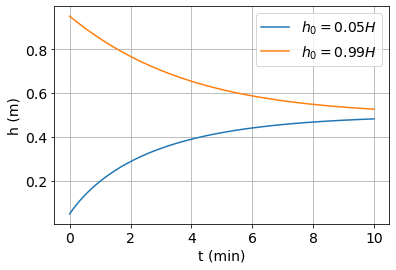

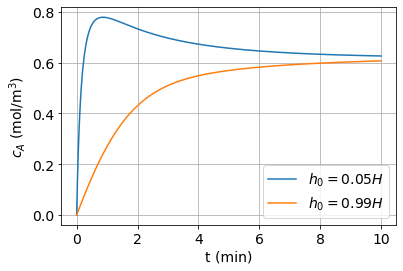

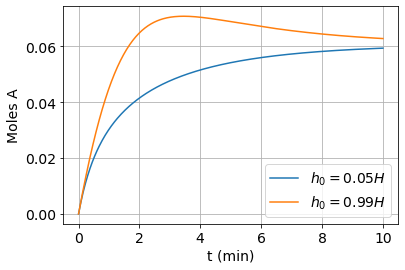

In [6]:
plot_it(t,h1,h2,'h (m)')
plot_it(t,cA1,cA2,'$c_A$ (mol/m$^3$)')
plot_it(t,cA1*Ac*h1,cA2*Ac*h2,'Moles A')

# Part 3

Steady state implies $\d{c_{i}}{t}=0$ and $\d{h}{t}=0$. 
From part 2, we know that at steady state the tank is 50% full. 
Since the tank is cylindrical, this translates directly to a relationship between $h$ and $H$:
$$
    h=\frac{H}{2}.
$$
From \eqref{eq:dci-dt}, 
\begin{align*}
    \frac{\dot{V}_{in}}{A_{c}h}\left(c_{i}^{in}-c_{i}\right)-kc_{i}^2 &= 0 \\
    kc_i^2 + \alpha c_i - \alpha c_i^{in} &= 0
\end{align*}
where $\alpha\equiv \frac{\dot{V}_{in}}{A_{c}h}$.
Using the quadratic equation we find
\begin{equation}
    c_i = \frac{ - \alpha \pm \sqrt{\alpha^2 - 4 k \alpha c_i^{in}}}{2k}
\end{equation}
Substituting numbers,

In [7]:
# steady-state result
h = 0.5*H
α = Vin/(Ac*h)
# css = Vin * cin / ( Ac*h*( k + Vin/(Ac*h) ) )
css = ( -α + np.sqrt(α**2 + 4*α*k*cin) )/(2*k)
print('\n\nSteady state concentration for h={:0.2f}H, we find c={:0.3f} mol/m^3\n'.format(h,css))



Steady state concentration for h=0.50H, we find c=0.618 mol/m^3

